In [ ]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras


# 1. DataLoader
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(X_train[200]) # 픽셀 값에 대한 이미지
print(y_train[200]) # 픽셀 값에 대한 라벨

모델링 순서
1.   데이터셋 생성
2.   전처리(scaling, 1차원으로 펼치기)
3.   시퀀스 모델 생성
4.   전처리
5.   컴파일
6.   fit()
7.   predict()
8.   evaluate()



모델에 데이터 입력하기 전
1) 255로 나누고 2) 한줄로 데이터 펼쳐서 입력

In [ ]:
# print(X_train.shape) # 흑백이므로 채널인 1이 표시되지 않음
L, H, W = X_train.shape
# 1) 전처리.. 1차원으로 늘리는 과정
X_train = X_train.reshape(-1, H * W) # 60000, 784
X_test = X_test.reshape(-1, H * W) # 10000, 784

print(X_train.shape)
print(X_test.shape)

# 2) 255로 나눈다
X_train = X_train/255
X_test = X_test/255

# print(X_train[0])

# 3) y값 처리하기... One Hot Encoding
Y_train = np_utils.to_categorical(y_train) # 전처리가 되었다는 의미로 변수명을 대문자(Y)로 변경
Y_test = np_utils.to_categorical(y_test)

print(Y_train[0])


### 하이퍼파라미터 지정 후, 모델 생성

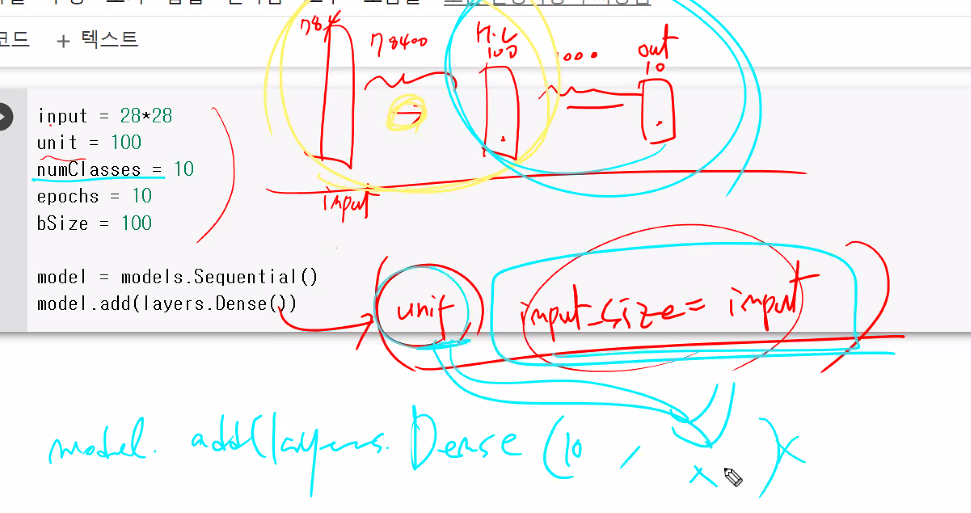

input...

In [ ]:
input = 28*28
unit = 100
numClasses = 10
epochs = 10
bSize = 100 #batch_size

# 모델 생성
model = models.Sequential()
model.add(layers.Dense(unit, activation = 'relu', input_shape=(input,))) #첫번째 hidden layer.. 
model.add(layers.Dense(numClasses,activation='softmax'))

# compile.. 위치매개변수로 넣는다.. 순서 확인
model.compile('sgd', 'categorical_crossentropy', 'accuracy')


# fit
model.fit(X_train, Y_train, epochs = 10, batch_size = bSize, validation_split = 0.2)

In [ ]:
# evaluation
model_performance = model.evaluate(X_test, Y_test, batch_size = bSize)
print('Loss : {}, Accuracy : {}'.format(*model_performance))

## 시각화

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
# 여기까지 history 정보를 쌓는 코드...

# fit.. 학습 할 때 나오는 로그 메시지들을 다 모아 리턴한다.. history
history = model.fit(X_train, Y_train, epochs = 50, batch_size = bSize, validation_split =0.2)


In [ ]:
plot_loss(history)

In [ ]:
plot_acc(history)